## Instructions {-}
Ce sujet est constitu√© de deux parties : la partie 1 correspond au sujet donn√© l'an dernier, dont la correction vous est donn√©e, la partie 2 constitue la partie qui sera √©valu√©e et se place dans la continuit√© de la partie 1.

# Enonc√© du probl√®me (Partie 1)

L'objectif de ce projet est d'estimer la longueur de c√¢ble sous-marin n√©cessaire pour relier deux c√¥tes $A$ et $B$  en utilisant des simulations conditionnelles.


Le c√¢ble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discr√©tis√© par une s√©quence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ o√π $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de c√¢ble n√©cessaire par la somme 
des longueurs sur les segments de la discr√©tisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situ√©es sur des points de discr√©tisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un mod√®le probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discr√©tisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la r√©alisation
d'un vecteur al√©atoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'esp√©rance ne contient qu'une seule valeur $\mu$ 
r√©p√©t√©e $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
d√©finis par $\sigma_{ij}=C(|x_i-x_j|)$ o√π $C$ est une
fonction d√©croissante, traduisant le fait que deux points 
g√©ographiquement proches ont tendance √† avoir des profondeurs plus similaires que deux points √©loign√©s.

On supposera que la matrice de covariance ainsi 
g√©n√©r√©e est d√©finie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliqu√©es aux termes d'une matrice de distance, produisent des matrices d√©finie-positives). 

Si on note $L$ la variable al√©atoire donnant la longueur de cable n√©cessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'esp√©rance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantit√© est difficilement accessible par le calcul. 
On va donc avoir recours √† des
simulations conditionnelles. C'est-√†-dire que l'on va simuler 
un nombre $K$ de r√©alit√©s (disons des r√©alisations du mod√®le 
probabiliste choisi), et sur chacune d'entre elle, 
la quantit√© de c√¢ble n√©cessaire sera √©valu√©e. 
On disposera ainsi d'un √©chantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simul√©es. Puis on approchera l'esp√©rance conditionnelle  par 
$$L^\star=\frac1{K}\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'√©crire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de donn√©es fourni et d'en d√©duire une estimation de la longueur de c√¢ble n√©cessaire.

## Questions th√©oriques

1. Quel th√©or√®me du cours nous autorise-t-il √† estimer l'esp√©rance conditionnelle par la moyenne empirique de simulations conditionnelles ?

*la loi forte des grands nombres, cf [Proba IV p.16](https://boisgera.github.io/CDIS/output/Probabilit%C3%A9%20IV.pdf), en v√©rifiant que $L$ est bien int√©grable*

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discr√©tisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

*cf. [Proba III p.18](https://boisgera.github.io/CDIS/output/Probabilit%C3%A9%20III.pdf),*

3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes ind√©pendantes, toutes d'esp√©rance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ o√π $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ ?

*cf. [Proba V p.12](https://cloud.mines-paristech.fr/index.php/s/GLDwtTAMOJCYk3i/download)*

4. En d√©duire un algorithme de simulation conditionnelle.

*Appliquer l'algorithme de la q.3 √† la loi conditionnelle (on calculera en particulier l'esp√©rance conditionnelle de $\mathbf{Z}$ sachant les donn√©es et la d√©composition de Cholesky de la matrice de covariance conditionnelle sachant les donn√©es).*

## Donn√©es du probl√®me
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les donn√©es $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'esp√©rance de chaque composante du vecteur al√©atoire $\mathbf{Z}$ est donn√©e par $\mu=-5.$

La fonction $C$ est d√©finie par $$C(h)=\sigma^2 e^{-|h|/a},$$

o√π $|h|$ correspond √† la distance entre deux points, $a=50$ et $\sigma^2=12$.


## Impl√©mentation

### Pr√©ambule

In [41]:
#Chargement de d√©pendances

import numpy as np
import matplotlib.pyplot as plt

#Discr√©tisation
A=0
B=500
N=101 #Nombre de points de discr√©tisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Param√®tres du mod√®le

mu=-5
a = 50
sigma2 = 12

#Donn√©es

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observ√©es

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


### Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le param√®tre $a$, et le param√®tre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance √† cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [42]:
#Fonction C

def Covexp(dist, rangeval, sigmaval):
    return sigmaval * np.exp(-dist/rangeval)


2. Calculer la matrice de distance.

In [43]:
distmat=abs(np.subtract.outer(discretization, discretization))

3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [44]:
Sigma = Covexp(distmat, a, sigma2)

4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [45]:
SigmaObs = Sigma[observation_indexes, :][:, observation_indexes]
SigmaObsUnknown = Sigma[observation_indexes, :][:, unknown_indexes]
SigmaUnknown = Sigma[unknown_indexes, :][:, unknown_indexes]

5. Calculer l'esp√©rance conditionnelle des composantes non observ√©es connaissant les observations et la repr√©senter avec les donn√©es.

In [46]:
invSigma = np.linalg.inv(SigmaObs) 
Ec = mu + np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs), depth-mu))

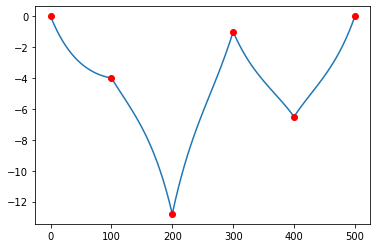

In [47]:
allval1 = np.zeros(N)
allval1[unknown_indexes] = Ec
allval1[observation_indexes] = depth
plt.plot(discretization, allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

6. Calculer la matrice de variance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

In [48]:
SigmaCond = SigmaUnknown - np.matmul(np.transpose(SigmaObsUnknown), np.matmul(np.linalg.inv(SigmaObs), SigmaObsUnknown))

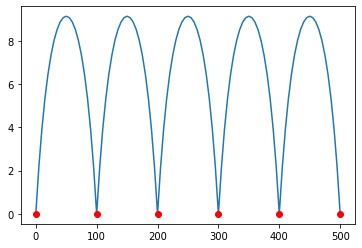

In [49]:
allval2 = np.zeros(N)
allval2[unknown_indexes] = np.diag(SigmaCond)
plt.plot(discretization, allval2)
plt.plot(discretization[observation_indexes], np.zeros(np.shape(observation_indexes)[0]), 'ro')
plt.show()

*On voit ici que la variance est nulle aux points de donn√©es (puisque la valeur est fix√©e) puis qu'elle augmente lorsqu'on s'√©loigne des donn√©es*

7. Effectuer une simulation conditionnelle. Sur un m√™me graphique, tracer la simulation ainsi que les donn√©es et l'esp√©rance conditionnelle. Commenter.

In [50]:
Cholesky = np.linalg.cholesky(SigmaCond)
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)

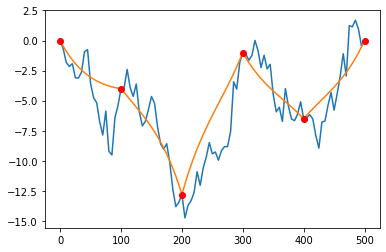

In [51]:
allval3 = np.zeros(N)
allval3[unknown_indexes] = simu
allval3[observation_indexes] = depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

*l'esp√©rance conditionnelle est lisse car c'est la fonction des donn√©es qui minimise la variance ; la simulation conditionnelle reproduit les fluctuations du mod√®le et donc l'aspect du fond marin*

8. Ecrire une fonction qui calcule la longueur du c√¢ble en fonction du vecteur des profondeurs et du pas de discr√©tisation.

In [52]:
def length(z,delta):
    return sum(np.sqrt(Delta**2+(z[1:N]-z[0:-1])**2))

9. Utiliser cette fonction pour calculer la longueur du c√¢ble √† partir de 100 simulations. Comparer l'esp√©rance conditionnelle (estim√©e) de la longueur avec la longueur de l'esp√©rance conditionnelle.

In [53]:
K = 100000
result = np.zeros(K)
for i in range(K):
    x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes] = Ec + np.matmul(Cholesky,x)
    result[i] = length(allval3,Delta)

In [54]:
sum(result)/K

522.4434128839796

In [55]:
length(allval1,Delta)

501.6468416918411

*On donne ici directement les r√©sultats pour 100000 simulations (comparer la vitesse d'√©x√©cution avec votre code pour voir l'int√©r√™t de la vectorisation).*

*On voit ici que la longueur donn√©e par l'esp√©rance conditionnelle est bien moindre que la longueur d'une simulation conditionnelle. Ceci est d√ª au fait que la simulation conditionnelle va reproduire les fluctuations attendues, au contraire de l'esp√©rance conditionnelle qui minimise la variance.*

*NB : On remarquera que c'est le seul endroit o√π on a utilis√© une boucle dans cette correction. On aurait pu s'en passer en utilisant notamment les outils de la librairie Pandas mais le code est plus lisible ainsi.*

10. Repr√©senter la suite $M_n$ des moyennes des longueurs de c√¢bles en fonction du nombre de simulations. Commenter.

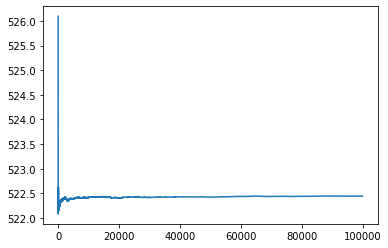

In [56]:
indice_simu = 1 + np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.show()

*Comme attendu d'apr√®s la LFGN, on observe une stabilisation de la valeur moyenne. Les variations sont imperceptibles apr√®s quelques dizaines de milliers de simulations*

11. Repr√©senter l'histogramme des longueurs de c√¢bles g√©n√©r√©es.

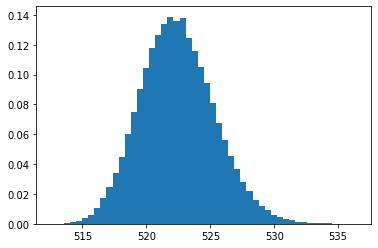

In [57]:
plt.hist(result, 50, density=True)
plt.show()

*L'histogramme ressemble √† une densit√© gaussienne, avec n√©anmoins une l√©g√®re dissym√©trie (plus de valeurs fortes).*

12. Donner un intervalle de confiance √† 95% de la longueur du c√¢ble par 2 m√©thodes diff√©rentes. Commenter.

*1√®re m√©thode : par approximation gaussienne. L'histogramme pr√©c√©dent sugg√®re qu'une loi gaussienne peut bien repr√©senter la loi conditionnelle de la longueur du cable. On obtient un intervalle de confiance en calculant la moyenne (milieu de l'intervalle) et l'√©cart type de l'√©chantillon de longueurs de c√¢ble puis en appliquant la formule du cours.*

In [58]:
Ln = sum(result)/K
sigman = np.std(result)
[Ln - sigman*1.96,Ln + sigman*1.96]

[516.7668796840921, 528.119946083867]

*2e m√©thode : on extrait les quantiles √† 2.5% et 97.5% de l'√©chantillon, c'est-√†-dire les valeurs $x_\alpha$ pour $\alpha \in \{0.025 ; 0.975\}$telles que* $$\mathbb{P}(L<x_\alpha) \approx \frac{1}{n}\sum_{i=1}^N 1_{\{L_i<x_\alpha\}}$$

In [59]:
np.quantile(result,[0.025,0.975])

array([517.11900716, 528.46977876])

*ATTENTION : ici l'utilisation du TCL tel qu'expos√© au d√©but du chapitre 5 fournissait un intervalle de confiance de l'**esp√©rance de la longueur de c√¢ble** et non de la **longueur de c√¢ble** (erreur fr√©quente).*

*On voit par ailleurs que la 2e m√©thode est plus pr√©cise car elle est bas√©e directement sur la loi empirique de l'√©chantillon*

13. Donner une estimation de la probabilit√© que la longueur du c√¢ble d√©passe 525 m.

In [60]:
np.mean(result>525)

0.1857

14. Reprendre les questions pr√©c√©dentes avec 1000, 10000 puis 100000 simulations. Commenter

*cf. le commentaire de la question 10. On observe une stabilisation progressive des estimateurs des diff√©rentes quantit√©s calcul√©es : moyennes, quantiles, probabilit√© de d√©passement de seuil.*

# Enonc√© 2021 (Partie 2)

Nous nous pla√ßons dans le m√™me cadre que ci-dessus. Nous tenons pour acquis les r√©sultats pr√©c√©dents et allons maintenant approfondir l'analyse.

## Valeurs positives

1. A la question 7 de la partie 1, on peut s'apercevoir que certains profils de profondeur pr√©sentent des valeurs positives, ce qui n'a pas de sens si on consid√®re qu'il n'y a pas de partie √©merg√©e entre les deux c√¥tes. Proposer et impl√©menter un algorithme de type rejet qui ne g√©n√®rera que des valeurs n√©gatives. Repr√©senter un profil de profondeur g√©n√©r√©.

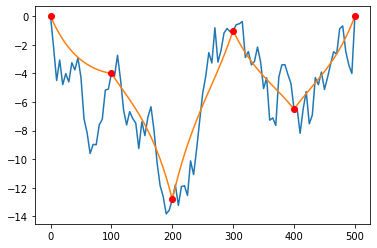

In [61]:
Cholesky = np.linalg.cholesky(SigmaCond)
p = np.shape(unknown_indexes)[0]

def all_negative(X): # Fonction indiquant la n√©gativit√© d'un vecteur X (c-√†-d si toutes ses composantes sont n√©gatives)
    for e in X:
        if e > 0:
            return False
    return True

def simu_rejet(E):
    x = np.random.normal(0, 1, p)
    simu = E + np.matmul(Cholesky, x)
    cpt = 0 # cpt est un compteur qui compte le nombre de rejets dans la boucle suivante
    if not all_negative(simu):
        cpt += 1
    while not all_negative(simu): # Boucle qui ne permet de g√©n√©rer que des profondeurs n√©gatives (algo de rejet)
        x = np.random.normal(0, 1, p)
        simu = E + np.matmul(Cholesky, x)
    return simu, cpt


allval3 = np.zeros(N)
allval3[unknown_indexes] = simu_rejet(Ec)[0]
allval3[observation_indexes] = depth
plt.plot(discretization, allval3)
plt.plot(discretization, allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

2. L'emploi de cet algorithme a-t-il un impact sur la valeur moyenne de la longueur de c√¢ble ? Sur l'histogramme des longueurs de c√¢ble ? Sur l'intervalle de confiance obtenu par la m√©thode des quantiles ? Sur la probabilit√© de d√©passement du seuil de 525 m? Donner une estimation du taux de rejet de l'algorithme. Consid√©rer 10000 simulations.

In [62]:
K = 10000
result2 = np.zeros(K)
allval3 = np.zeros(N)
allval3[observation_indexes] = depth
for i in range(K):
    allval3[unknown_indexes] = simu_rejet(Ec)[0]
    result2[i] = length(allval3, Delta)

In [63]:
sum(result2)/K

521.7948777840493

On voit que la valeur moyenne est rest√©e quasiment la m√™me, vu que la partie positive est assez n√©gligeable devant la partie n√©gative du cable.

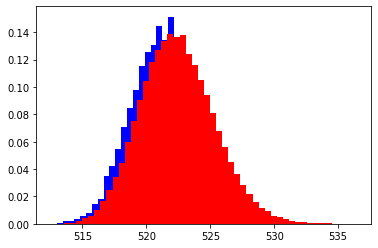

In [64]:
plt.hist(result2, 50, density=True, color='b') # Avec rejet
plt.hist(result, 50, density=True , color='r') # Sans rejet
plt.show() 

L'histogramme apr√®s filtration des valeurs n√©gatives est d√©cal√© un peu √† gauche par rapport √† celui sans filtration. Ceci traduit le fait que l'on a √©limin√© les profondeurs positives, et donc on diminue la longueur moyenne (translation de l'histogramme √† gauche).

In [65]:
D = 10000
rejet = np.zeros(D)
for i in range(D):
    rejet[i] = simu_rejet(Ec)[1]
s = sum(rejet)/D # le taux de rejet de l'algorithme
print(s)

0.9622


Nous remarquons un taux de rejet de 96.22%, qui est assez grand.

In [66]:
np.quantile(result2,[0.025,0.975])

array([516.66241537, 527.63811201])

Tout comme la longueur moyenne du c√¢ble, l'intervalle de confiance est d√©cal√© un peu √† gauche.

In [67]:
np.mean(result2 > 525)

0.1282

Comme les longueurs moyennes ont tendance √† diminuer avec la m√©thode de rejet, la probabilit√© que la longueur du c√¢ble d√©passe 525 devrait √™tre plus petite que celle sans rejet. C'est le cas ici.

## Approche Bay√©sienne

Dans la premi√®re partie, on a consid√©r√© que l'ensemble des param√®tres du mod√®le √©tait parfaitement connu. Toutes choses √©gales par ailleurs, on va maintenant consid√©rer que la moyenne $\mu$ est issue d'une estimation ent√¢ch√©e d'une incertitude. Plus pr√©cis√©ment, on va mod√©liser cette incertitude en consid√©rant que $\mu \sim \mathcal{N}(-5,4)$.

On va √©galement d√©composer le vecteur $\mathbf{Z}$ en $\mathbf{Z} = (\mathbf{Z}_{\text{OBS}},\mathbf{Z}_{\text{UNK}})$. On notera $C_{\text{OBS}}$ et $C_{\text{UNK}}$ les matrices de covariance respectives de $\mathbf{Z}_{\text{OBS}}$ et $\mathbf{Z}_{\text{UNK}}$ ainsi que $C_{\text{OBS},\text{UNK}}$ la matrice des covariances entre ces deux vecteurs.

### Questions th√©oriques

3. Montrer que $\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}} \sim \mathcal{N}(\widehat{\mu},\widehat{\sigma}^2)$ avec
$$\widehat{\sigma}^2 = (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{1} + \frac1{4})^{-1},$$ 
o√π $\mathbf{1}$ est un vecteur de longueur 6 (soit la longueur du vecteur $\mathbf{Z}_{\text{OBS}}$) ne contenant que des 1 et 
$$\widehat{\mu} = \widehat{\sigma}^2 (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )$$
Indication : √©crire la densit√© jointe du vecteur $(\mathbf{Z}_{\text{OBS}},\mu)$, calculer $-2 \ln$ de cette densit√© puis identifier la forme quadratique faisant intervenir $\mu$.

On a : 

$$f_{Z_{OBS},\mu }(z_{OBS},\mu) = f_{Z_{OBS}|\mu=\hat{\mu}}(z_{OBS})*f_{\mu}(\hat{\mu})$$
 

$$f_{Z_{OBS},\mu }(z_{OBS},\mu) = f_{\mu|Z_{OBS}=z_{OBS}}(\hat{\mu})*f_{Z_{OBS}}(z_{OBS})$$

Avec:

$$f_{Z_{OBS}|\mu=\hat{\mu}}(z) = \frac{1}{(2\pi)^3\sqrt{det(C_{OBS})}}e^{-\frac{1}{2}(z-\mu^{*}\mathbf{1})^{t}C_{OBS}^{-1}(z-\mu^{*}\mathbf{1})}$$

et:

$$f_{\mu}(\mu^{*}) = \frac{1}{2\sqrt{2\pi}}e^{-\frac{(\mu^{*}+5)^2}{8}}$$

On en d√©duit donc que:

$$f_{Z_{OBS},\mu }(z_{OBS},\hat{\mu}) = \frac{1}{(2\pi)^{\frac{7}{2}}\sqrt{4det(C_{OBS})}}e^{-\frac{(\mu^{*}+5)^2}{8}-\frac{1}{2}(z-\mu^{*}\mathbf{1})^{t}C_{OBS}^{-1}(z-\mu^{*}\mathbf{1})}$$

On d√©veloppe le terme:

$$\frac{(\mu^{*}+5)^2}{8}+\frac{1}{2}(z-\mu^{*}\mathbf{1})^{t}C_{OBS}^{-{1}}(z-\mu^{*}\mathbf{1}) $$
$$ =  
\mu^{*2}(\mathbf{1}^tC_{OBS}\mathbf{1}+\frac{1}{4})-\mu^{*}(\mathbf{1}^tC_{OBS}z + z^tC_{OBS}\mathbf{1}+\frac{10}{4}) + z^tC_{OBS}^{-1}z + \frac{25}{4}$$ 

$$= \frac{(\mu^{*}-\hat{\mu}(z))^2}{\hat\sigma^2}$$

Avec : $$\widehat{\sigma}^2 = (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{1} + \frac1{4})^{-1},$$
$$\widehat{\mu}(z) = \widehat{\sigma}^2 (\mathbf{1}^t C_{\text{OBS}}^{-1}z - \frac{5}{4} )$$

Par cons√©quent:

$$f_{Z_{OBS},\mu}(z, \mu^{*}) = \frac{1}{(2\pi)^{\frac{7}{2}}\sqrt{4det(C_{OBS})}}e^{-\frac{(\mu^{*}-\hat{\mu}(z))^2}{2\hat\sigma^2}}$$

En posant : $\hat{\mu} = \hat{\mu}(z_{OBS})$ On obtient: 

$$f_{\mu|Z_{OBS}=z_{OBS}}(\mu^{*}) = \frac{1}{\sqrt{2\pi}\hat{\sigma}}e^{\frac{(\mu^{*}-\hat{\mu})^2}{2\hat{\sigma}^2}}$$

Par suite, on obtient le r√©sultat demand√©:

$$\mu|Z_{OBS}=z_{OBS} \sim \mathcal{N}(\hat{\mu}, \hat{\sigma}^2)$$

4. Montrer que si $X$, $Y$ et $Z$ sont trois vecteurs al√©atoires √† densit√©, alors $f_{X,Y|Z = z}(x,y) = f_{X|Y=y,Z=z}(x)f_{Y|Z=Z}(y)$

On a : $$f_{X,Y|Z = z}(x,y) = \frac{f_{X,Y,Z}(x,y,z)}{f_{Z}(z)}= \frac{f_{X,Y,Z}(x,y,z)}{f_{Y,Z}(y,z)}\times \frac{f_{Y,Z}(y,z)}{f_{Z}(z)} = f_{X|Y = y,Z = z}(x)f_{Y|Z = z}(y)$$

5. En d√©duire que la densit√© de $(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ s'√©crit comme le produit de $f_{\mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ et de $f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ que l'on exprimera.

    Indication : $f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ est identique √† la densit√© $f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ utilis√©e dans la partie 1 avec $\mu = \mu^\star$

En posant $X = \mathbf{Z}_{\text{UNK}}, Y = \mu$ et $Z = \mathbf{Z}_{\text{OBS}}$, on applique la formule dans la question 4 :

$$f_{\mathbf{Z}_{\text{UNK}}, \mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(\mathbf{z}_{\text{UNK}}, \mu^{\ast }) = f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}f_{\mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$$

avec:

$$f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(\mathbf{z}_{\text{UNK}}) = \frac{1}{(2\pi )^{k/2}\sqrt{det(CS_{UNK})}}exp(-\frac{1}{2}(\mathbf{z}_{\text{UNK}}-\psi(\mathbf{z}_{\text{OBS}}))^{T}CS_{UNK}^{-1}(\mathbf{z}_{\text{UNK}}-\psi(\mathbf{z}_{\text{OBS}})))$$

o√π : $$k = 95$$
$$CS_{UNK} = C_{UNK} - C_{UNK,OBS}C_{OBS}^{-1}(C_{UNK,OBS})^{T}$$  
$$\psi (\mathbf{z}_{OBS}) =  \mu ^{\ast } + C_{UNK,OBS}C_{OBS}^{-1}(\mathbf{z}_{OBS} - \mu ^{\ast })$$

### Simulation

On va maintenant chercher √† simuler les valeurs de $\mathbf{Z}_{\text{UNK}}$ en tenant compte de l'incertitude sur $\mu$.

En premi√®re approche, on pourrait chercher √† obtenir la densit√© de $\mathbf{Z}_{\text{UNK}} | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ en calculant 
$$\int_\mathbb{R} f_{(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(\mathbf{z}_{\text{UNK}},\mu^\star) d\mu^\star$$
mais ce calcul a peu de chances d'aboutir.

On va plut√¥t proc√©der par simulations en cascade, c'est-√†-dire que pour chaque simulation de $\mathbf{Z}_{\text{UNK}}$, on va d'abord g√©n√©rer une valeur $\mu^\star$ de $\mu$ selon $f_{\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}}}$ puis on simulera $\mathbf{Z}_{\text{UNK}}$ selon $f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}},\mu = \mu^\star}$.


6. Calculer $\widehat{\mu}$ et $\widehat{\sigma}^2$. 

In [68]:
# On applique les deux formules de la 3√®me question
vec_un = np.array([1]*6)
sigma2_bar = float((np.matmul(np.transpose(vec_un), np.matmul(np.linalg.inv(SigmaObs), vec_un))+ 0.25)**(-1))
mu_bar = float(sigma2_bar * (np.matmul(np.transpose(vec_un), np.matmul(np.linalg.inv(SigmaObs), depth)) - 1.25))

In [69]:
mu_bar, sigma2_bar

(-4.291350330933772, 1.5368909974762894)

7. Calculer la probabilit√© de $\{\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}} > 0\}$. Proposer et impl√©menter un algorithme de simulation de $\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}, \mu <0$.

Cette probabilit√© vaut l'int√©grale de la densit√© de la variable al√©atoire $\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ (dont on conna√Æt la formule puisqu'il s'agit d'une gaussienne) entre 0 et +$\infty$

In [70]:
from scipy.integrate import quad # fonction pr√©d√©finie qui calcule approximativement les int√©grales
xmin = 0
xmax = 1000
def f_c(x):
    r = np.sqrt(1/(2*np.pi*sigma2_bar)) * np.exp(-(x-mu_bar)**2/(2*sigma2_bar))
    return r
    
Proba_sup0, err = quad(f_c, xmin, xmax) # err : l'erreur commise lors de l'approximation

In [71]:
Proba_sup0

0.00026852263881660653

On remarque que la proba est quasi-nulle, ce qui est normal puisque la moyenne de notre variable al√©atoire est -4.29, ce qui 
signifie que l'int√©grale de la densit√© est non nulle juste dans une petite z√¥ne autour de la moyenne. De plus, la variance est de 1.53 donc la demi-largeur de la gaussienne est d'√† peu pr√®s 1.53. Ceci signifie que la densit√© commence √† tendre tr√®s vite vers 0 √† partir de l'abscisse -4.29+1.53 = -2.76 qui est bien loin de 0. Et la quasi-nullit√© de cette probabilit√© traduit le fait que la n√©gativit√© de ùúá sachant Zobs est quasi-s√ªre.

In [72]:
# algorithme de simulation de  ùúá|ùêôOBS=ùê≥OBS, ùúá<0
mu_etoile = np.random.normal(loc = mu_bar , scale= np.sqrt(sigma2_bar))
a = mu_etoile
while a > 0:
    mu_etoile = np.random.normal(loc = mu_bar , scale= np.sqrt(sigma2_bar))
    a = mu_etoile

8. G√©n√©rer un couple $\mathbf{Z}_{\text{UNK}}, \mu| \mathbf{Z}_{\text{OBS}}, \mu <0$ et repr√©senter le profil de profondeur obtenu. On prendra soin de ne g√©n√©rer que des valeurs n√©gatives de $\mathbf{Z}_{\text{UNK}}$ en utilisant l'algorithme de la section pr√©c√©dente.

In [73]:
Ec = mu_etoile + np.matmul(np.transpose(SigmaObsUnknown), np.matmul(np.linalg.inv(SigmaObs), depth-mu_etoile))
x = np.random.normal(0, 1, np.shape(unknown_indexes)[0])
simu_rejet = Ec + np.matmul(Cholesky, x)
while not (simu_rejet < 0).all():
    x = np.random.normal(0, 1, np.shape(unknown_indexes)[0])
    simu_rejet = Ec + np.matmul(Cholesky ,x)

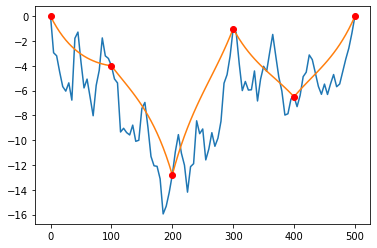

In [74]:
# Le profil de profondeur obtenu
allval4 = np.zeros(N)
allval4[unknown_indexes] = simu_rejet
allval4[observation_indexes] = depth
plt.plot(discretization, allval4)
plt.plot(discretization, allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

9. G√©n√©rer 10000 profils de profondeur et calculer les longueurs de c√¢ble associ√©es. Comparer la valeur moyenne de la longueur de c√¢ble, dont on visualisera la convergence, l'histogramme des longueurs de c√¢ble, l'intervalle de confiance obtenu par la m√©thode des quantiles, la probabilit√© de d√©passement du seuil de 525 m avec les r√©sultats obtenus pr√©c√©demment. Commenter.

In [75]:
K = 10000
result_rejet = np.zeros(K)
for i in range(K):
    mu_etoile = np.random.normal(loc = mu_bar, scale = np.sqrt(sigma2_bar))
    a = mu_etoile
    while a > 0:
        mu_etoile = np.random.normal(loc = mu_bar, scale = np.sqrt(sigma2_bar))
        a = mu_etoile
    Ec = mu_etoile + np.matmul(np.transpose(SigmaObsUnknown), np.matmul(np.linalg.inv(SigmaObs), depth-mu_etoile))
    x = np.random.normal(0, 1, np.shape(unknown_indexes)[0])
    simu_rejet = Ec + np.matmul(Cholesky, x)
    while not (simu_rejet < 0).all():
        x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu_rejet = Ec + np.matmul(Cholesky, x)
    allval3[unknown_indexes] = simu_rejet
    result_rejet[i] = length(allval3, Delta)

In [76]:
sum(result_rejet)/K

521.7237762519723

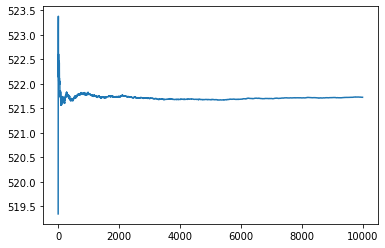

In [77]:
indice_simu = 1 + np.arange(K)
plt.plot(indice_simu, np.cumsum(result_rejet)/indice_simu)
plt.show()

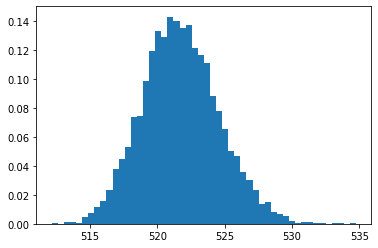

In [78]:
plt.hist(result_rejet,50,density=True)
plt.show()

In [79]:
np.quantile(result_rejet,[0.025,0.975])

array([516.45539585, 527.56663592])

In [80]:
np.mean(result_rejet>525)

0.1271

On trouve qu'en appliquant maintenant la m√©thode de rejet, la valeur moyenne et l'intervale de confiance restent √† peu pr√®s les m√™mes que ceux dans la question 2 o√π on fixe $\mu$. Cependant, l'histrogramme est encore d√©cal√© √† gauche. Or, la probabilit√© que L d√©passe 525m repr√©sente la surface de la densit√© (l'histogramme) entre 525 et $+\infty$, alors elle sera plus petite que celle de la 2√®me question.

10. Qu'adviendrait-il selon vous si on rendait √©galement al√©atoires les autres param√®tres du mod√®le $\sigma^2$ et $a$ ?

Par analogie avec ce qu'on a constat√© sur la profondeur moyenne $\mu$, la valeur moyenne de la longueur de c√¢ble et l'intervalle de confiance resteront presque les m√™mes et la probabilit√© de d√©passement du seuil 525m diminue un peu. De plus, 
En rendant al√©atoire la variance $\sigma^2$ et $a$, on aurait un plus grand intervalle d'incertitude et probablement une longueur de cable moyenne plus importante.

11. (facultatif) On suppose d√©sormais que $\alpha = \frac1{\sigma^2} \sim \Gamma(a_1,a_2)$, o√π $\sigma^2$ correspond au param√®tre qui intervient dans la fonction $C$. Donner l'expression de la densit√© de $\alpha | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$,  de $\mu | \alpha, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}},$ et de $\mathbf{Z}_{\text{UNK}} | \mu, \alpha, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$. Proposer un algorithme de simulation tenant compte de l'incertitude sur le param√®tre $\alpha$ et analyser son impact sur les diff√©rentes quantit√©s √©valu√©es.

    Indication : Pour identifier la densit√© de $\alpha | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$, exprimer d'abord la densit√© jointe de $(\alpha,\mu, \mathbf{Z}_{\text{OBS}})$ puis marginaliser pour obtenir la densit√© de $(\alpha,\mathbf{Z}_{\text{OBS}})$
